In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

In [9]:
df = pd.read_csv("iris.csv",sep=",")
Y = df['species']
df.drop(['species'],axis=1,inplace=True)
X = df
X.head()

sepalLength  sepalWidth  petalLength  petalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40)

In [11]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["sepalLength","sepalWidth","petalLength","petalWidth"],  
                         class_names=["setosa","versicolor","virginica"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

In [13]:
results = clf.predict(X_test)
results

array(['virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa'], dtype=object)

In [24]:
matrizcf =  confusion_matrix(Y_test, results)
matrizcf

array([[23,  0,  0],
       [ 0, 18,  1],
       [ 0,  2, 16]])

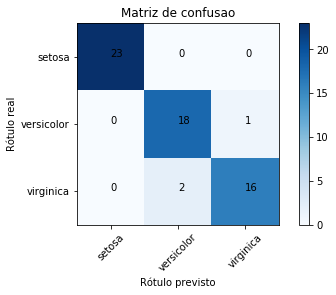

In [36]:
# Plotando matriz de confusão
import matplotlib.pyplot as plt
import itertools

cm = matrizcf
cmap=plt.cm.Blues
normalize = False
classes =  ["setosa","versicolor","virginica"]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Matriz de confusao')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt))

plt.tight_layout()
plt.ylabel('Rótulo real')
plt.xlabel('Rótulo previsto')
plt.savefig("iris-confusao.pdf")
plt.show()
